### **Importing Libraries**

In [1]:
from scipy.io import loadmat
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

### **RandInitialise.py**

In [2]:
def initialise(a, b):
	epsilon = 0.15
	c = np.random.rand(a, b + 1) * (
	# Randomly initialises values of thetas between [-epsilon, +epsilon]
	2 * epsilon) - epsilon
	return c

### **Model.py**

In [3]:
def neural_network(nn_params, input_layer_size, hidden_layer_one_size, hidden_layer_two_size, num_labels, X, y, lamb):
    # Weights are split back to Theta1, Theta2, Theta3
    Theta1 = np.reshape(nn_params[:hidden_layer_one_size * (input_layer_size + 1)],
                        (hidden_layer_one_size, input_layer_size + 1))
    Theta2 = np.reshape(nn_params[hidden_layer_one_size * (input_layer_size + 1):
                                  hidden_layer_one_size * (input_layer_size + 1) + hidden_layer_two_size * (hidden_layer_one_size + 1)],
                        (hidden_layer_two_size, hidden_layer_one_size + 1))
    Theta3 = np.reshape(nn_params[hidden_layer_one_size * (input_layer_size + 1) + hidden_layer_two_size * (hidden_layer_one_size + 1):],
                        (num_labels, hidden_layer_two_size + 1))

    # Forward Propagation

    m = X.shape[0]
    one_matrix = np.ones((m,1))
    X = np.append(one_matrix, X, axis=1) # Adding bias unit to first layer
    a1 = X
    z2 = np.dot(X, Theta1.transpose())
    a2 = 1 / (1 + np.exp(-z2)) # Activation for second layer
    one_matrix = np.ones((m,1))
    a2 = np.append(one_matrix, a2, axis = 1) # Adding bias unit to first hidden layer
    z3 = np.dot(a2, Theta2.transpose())
    a3 = 1 / (1 + np.exp(-z3)) # Activation for third layer
    one_matrix = np.ones((m,1))
    a3 = np.append(one_matrix, a3, axis = 1) # Adding bias unit to second hidden layer
    z4 = np.dot(a3, Theta3.transpose())
    a4 = 1 / (1 + np.exp(-z4)) # Activation for fourth layer

    # Changing the y labels into vectors of boolean values.
    # For each label between 0 and 9, there will be a vector of length 10
    # where the ith element will be 1 if the label equals i
    y_vect = np.zeros((m,10))
    for i in range(m):
        y_vect[i, int(y[i])] = 1

    # Calculating cost function
    J = (1 / m) * (np.sum(np.sum(-y_vect * np.log(a4) - (1 - y_vect) * np.log(1 - a4)))) + \
        (lamb / (2 * m)) * (np.sum(np.sum(Theta1[:, 1:] ** 2)) + np.sum(np.sum(Theta2[:, 1:] ** 2)) + np.sum(np.sum(Theta3[:, 1:] ** 2)))

    # Backpropagation
    Delta4 = a4 - y_vect
    Delta3 = np.dot(Delta4, Theta3) * a3 * (1 - a3)
    Delta3 = Delta3[:, 1:]
    Delta2 = np.dot(Delta3, Theta2) * a2 * (1 - a2)
    Delta2 = Delta2[:, 1:]

    # Gradient
    Theta1[:, 0] = 0
    Theta1_grad = (1 / m) * np.dot(Delta2.transpose(), a1) + (lamb / m) * Theta1
    Theta2[:, 0] = 0
    Theta2_grad = (1 / m) * np.dot(Delta3.transpose(), a2) + (lamb / m) * Theta2
    Theta3[:, 0] = 0
    Theta3_grad = (1 / m) * np.dot(Delta4.transpose(), a3) + (lamb / m) * Theta3
    grad = np.concatenate((Theta1_grad.flatten(), Theta2_grad.flatten(), Theta3_grad.flatten()))

    return J, grad

### **Prediction.py**

In [4]:
def predict(Theta1, Theta2, Theta3, X):
    m = X.shape[0]
    one_matrix = np.ones((m, 1))
    X = np.append(one_matrix, X, axis=1)  # Adding bias unit to first layer
    z2 = np.dot(X, Theta1.transpose())
    a2 = 1 / (1 + np.exp(-z2))  # Activation for second layer
    one_matrix = np.ones((m, 1))
    a2 = np.append(one_matrix, a2, axis=1)  # Adding bias unit to first hidden layer
    z3 = np.dot(a2, Theta2.transpose())
    a3 = 1 / (1 + np.exp(-z3))  # Activation for third layer
    one_matrix = np.ones((m, 1))
    a3 = np.append(one_matrix, a3, axis=1)  # Adding bias unit to second hidden layer
    z4 = np.dot(a3, Theta3.transpose())
    a4 = 1 / (1 + np.exp(-z4))  # Activation for fourth layer
    p = np.argmax(a4, axis=1)  # Predicting the class based on the maximum value of the hypothesis
    return p

### **Display.py**

In [5]:
def display_images_after_1000_predictions(Theta1, Theta2, Theta3, X, y, iterations=600000):
    for i in range(iterations):
      # Break the loop if the iteration limit is reached
      if (i >= len(X)):
        break
      else:
        # Display image after every 10000 iterations
        if i % 1000 == 0:
          print(f"Iteration: {i}")
          # Display the image along with the predicted label
          current_image = X[i].reshape((28, 28)) * 255  # Reshape individual image from the dataset

          plt.gray()
          plt.imshow(current_image, interpolation='nearest')
          plt.show()

          predicted_label = pred[i]  # Fetch the predicted label for this image
          print(f"Predicted Label: {predicted_label}")
          print(f"Actual/True Label: {y[i]}")

### **Main.py**

Iteration: 0


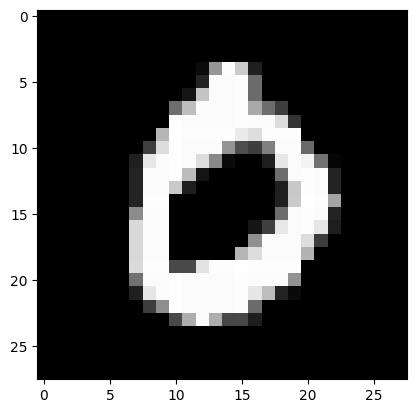

Predicted Label: 0
Actual/True Label: 0.0
Iteration: 1000


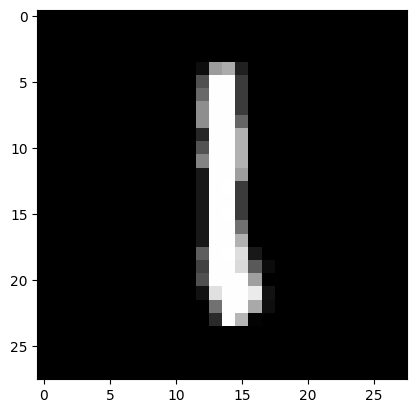

Predicted Label: 1
Actual/True Label: 1.0
Iteration: 2000


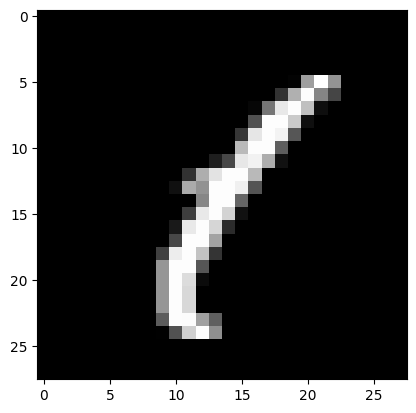

Predicted Label: 1
Actual/True Label: 1.0
Iteration: 3000


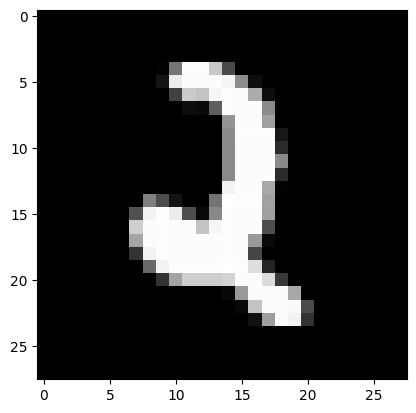

Predicted Label: 2
Actual/True Label: 2.0
Iteration: 4000


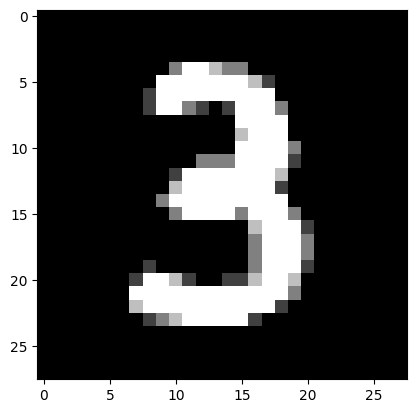

Predicted Label: 3
Actual/True Label: 3.0
Iteration: 5000


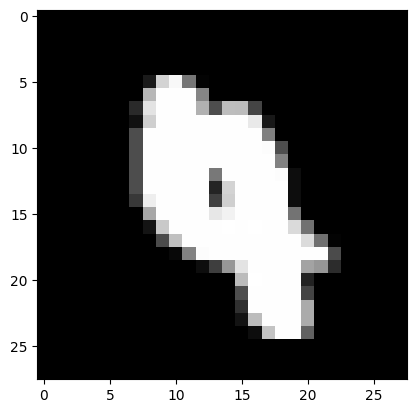

Predicted Label: 4
Actual/True Label: 4.0
Iteration: 6000


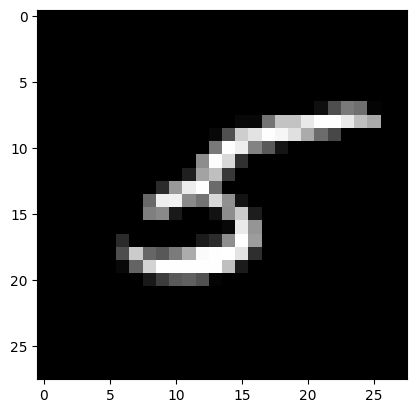

Predicted Label: 5
Actual/True Label: 5.0
Iteration: 7000


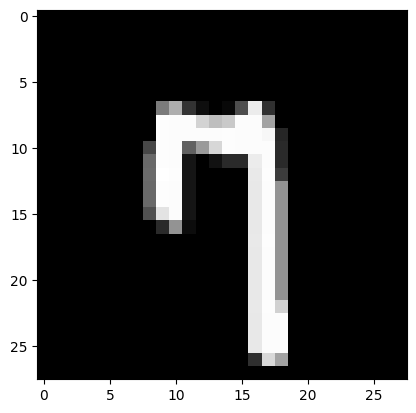

Predicted Label: 7
Actual/True Label: 7.0
Iteration: 8000


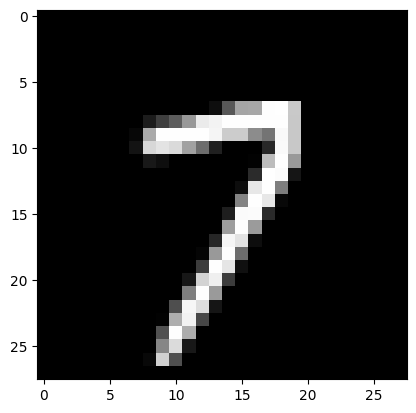

Predicted Label: 7
Actual/True Label: 7.0
Iteration: 9000


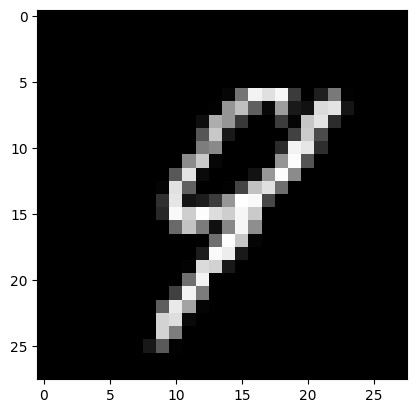

Predicted Label: 9
Actual/True Label: 9.0
Test Set Accuracy: 97.190000
Iteration: 0


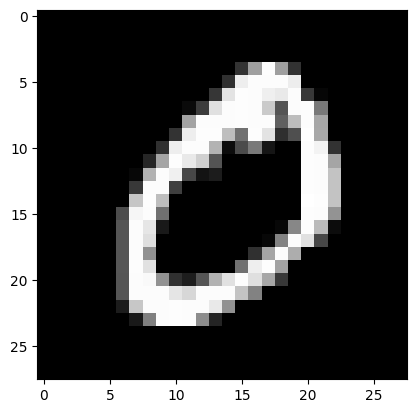

Predicted Label: 0
Actual/True Label: 0.0
Iteration: 1000


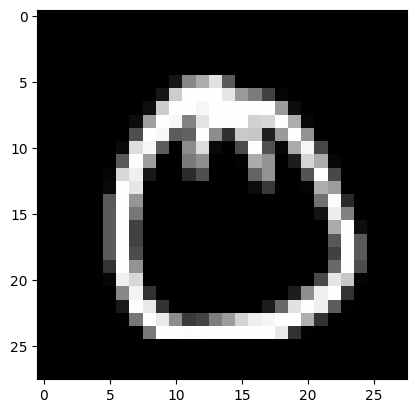

Predicted Label: 0
Actual/True Label: 0.0
Iteration: 2000


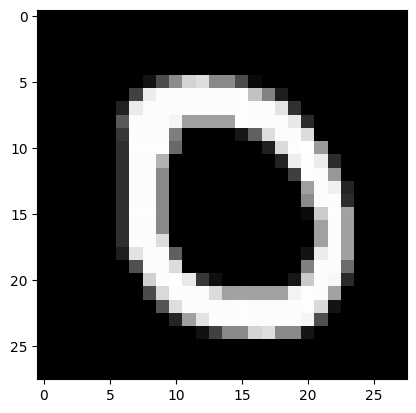

Predicted Label: 0
Actual/True Label: 0.0
Iteration: 3000


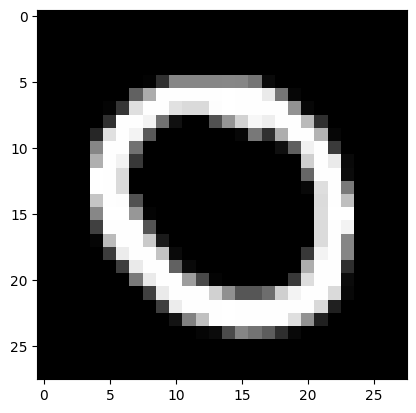

Predicted Label: 0
Actual/True Label: 0.0
Iteration: 4000


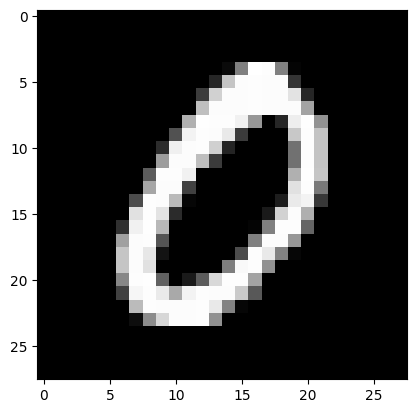

Predicted Label: 0
Actual/True Label: 0.0
Iteration: 5000


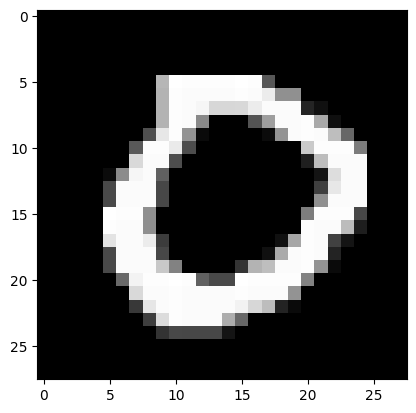

Predicted Label: 0
Actual/True Label: 0.0
Iteration: 6000


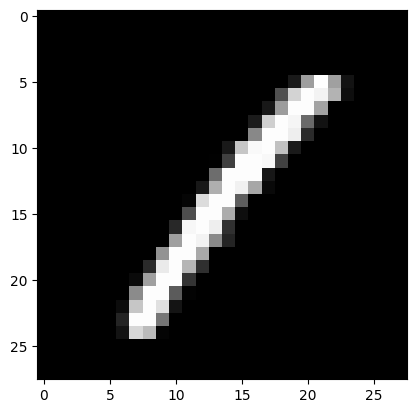

Predicted Label: 1
Actual/True Label: 1.0
Iteration: 7000


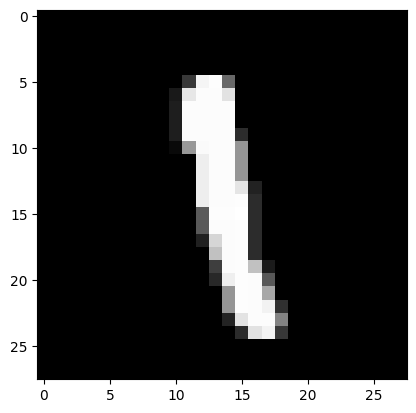

Predicted Label: 1
Actual/True Label: 1.0
Iteration: 8000


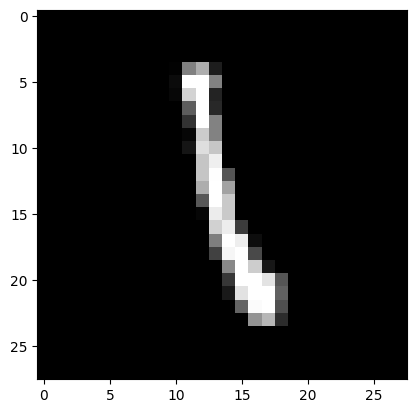

Predicted Label: 1
Actual/True Label: 1.0
Iteration: 9000


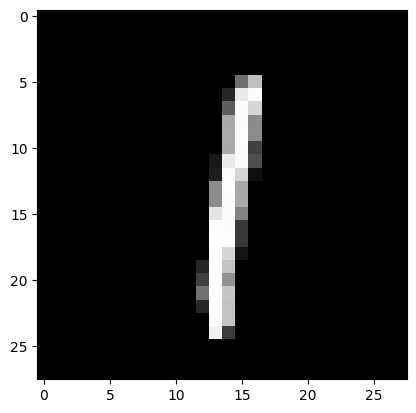

Predicted Label: 1
Actual/True Label: 1.0
Iteration: 10000


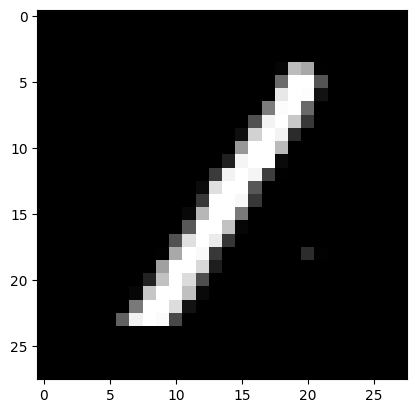

Predicted Label: 1
Actual/True Label: 1.0
Iteration: 11000


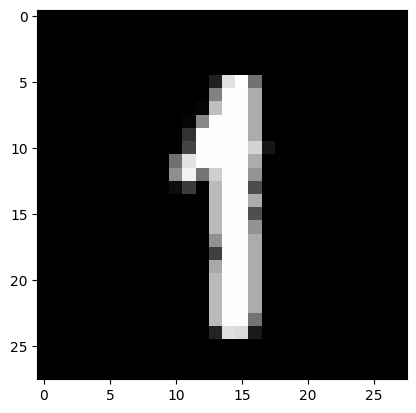

Predicted Label: 1
Actual/True Label: 1.0
Iteration: 12000


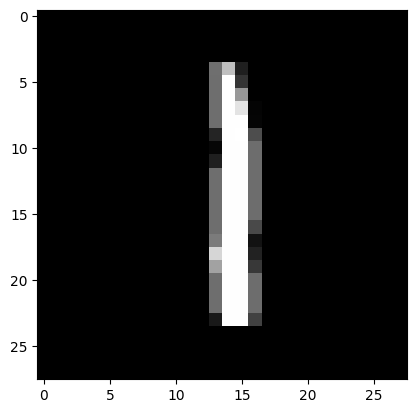

Predicted Label: 1
Actual/True Label: 1.0
Iteration: 13000


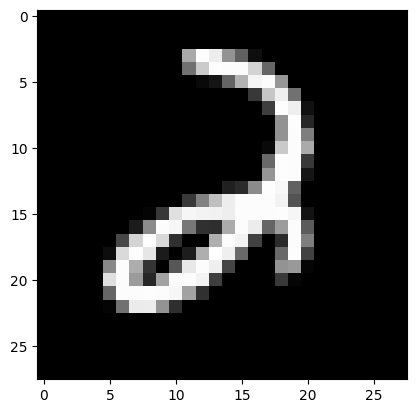

Predicted Label: 2
Actual/True Label: 2.0
Iteration: 14000


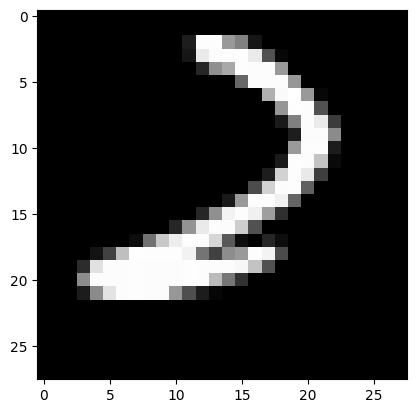

Predicted Label: 2
Actual/True Label: 2.0
Iteration: 15000


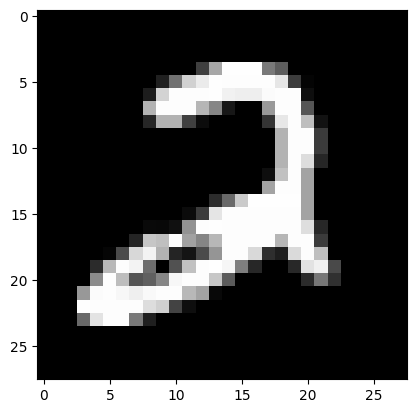

Predicted Label: 2
Actual/True Label: 2.0
Iteration: 16000


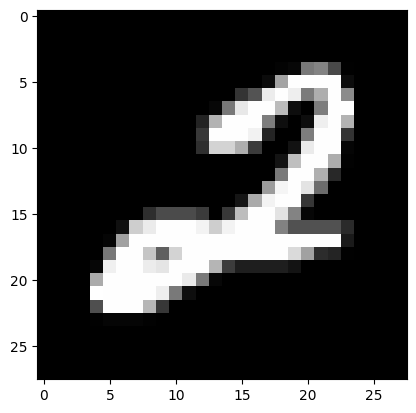

Predicted Label: 2
Actual/True Label: 2.0
Iteration: 17000


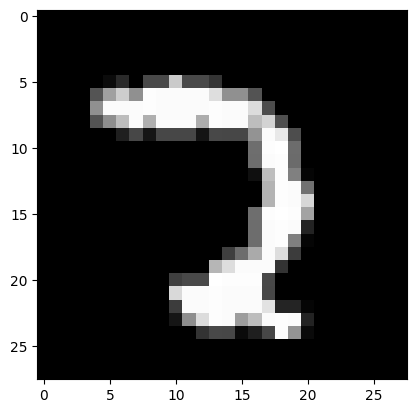

Predicted Label: 2
Actual/True Label: 2.0
Iteration: 18000


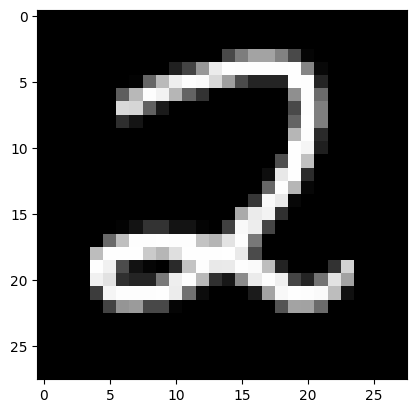

Predicted Label: 2
Actual/True Label: 2.0
Iteration: 19000


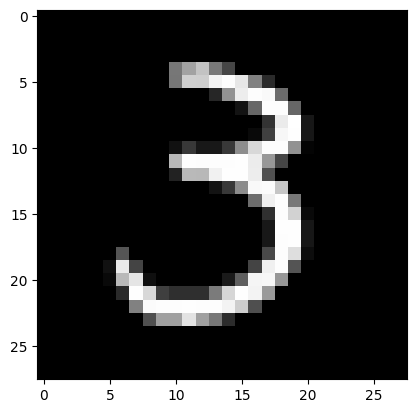

Predicted Label: 3
Actual/True Label: 3.0
Iteration: 20000


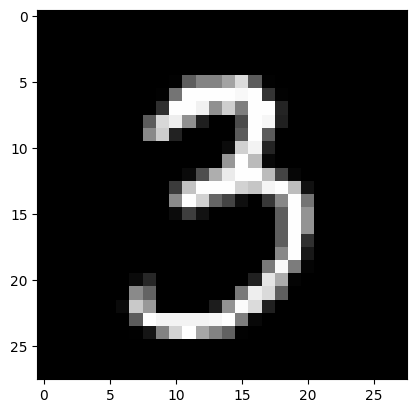

Predicted Label: 3
Actual/True Label: 3.0
Iteration: 21000


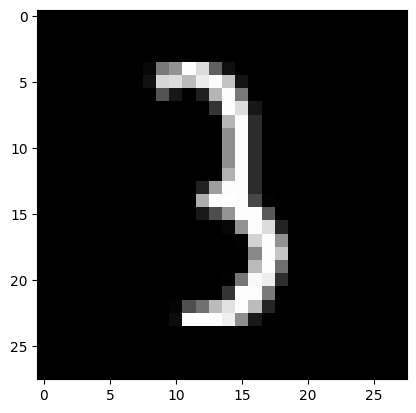

Predicted Label: 3
Actual/True Label: 3.0
Iteration: 22000


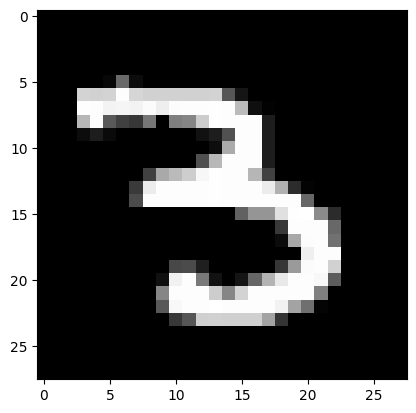

Predicted Label: 3
Actual/True Label: 3.0
Iteration: 23000


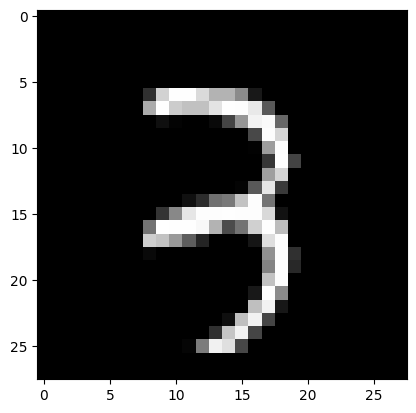

Predicted Label: 3
Actual/True Label: 3.0
Iteration: 24000


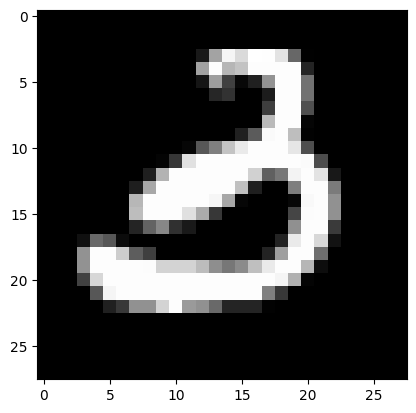

Predicted Label: 3
Actual/True Label: 3.0
Iteration: 25000


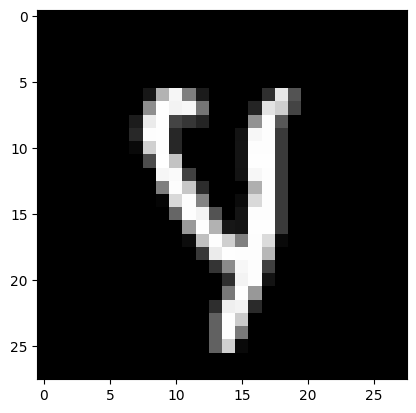

Predicted Label: 4
Actual/True Label: 4.0
Iteration: 26000


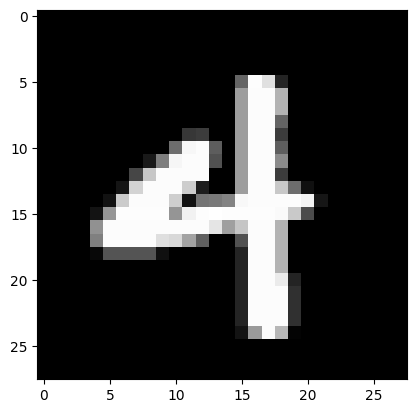

Predicted Label: 4
Actual/True Label: 4.0
Iteration: 27000


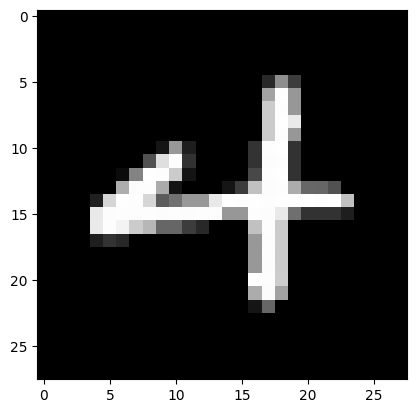

Predicted Label: 4
Actual/True Label: 4.0
Iteration: 28000


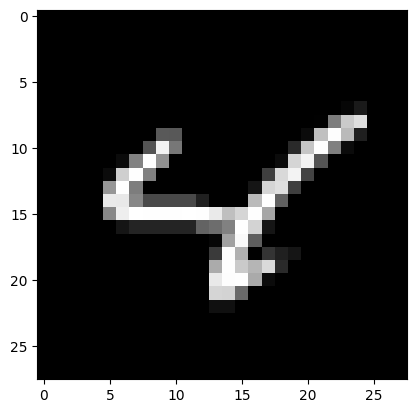

Predicted Label: 4
Actual/True Label: 4.0
Iteration: 29000


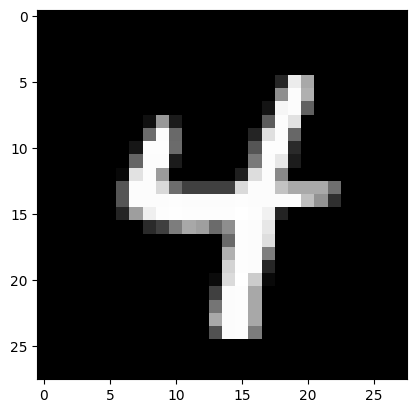

Predicted Label: 4
Actual/True Label: 4.0
Iteration: 30000


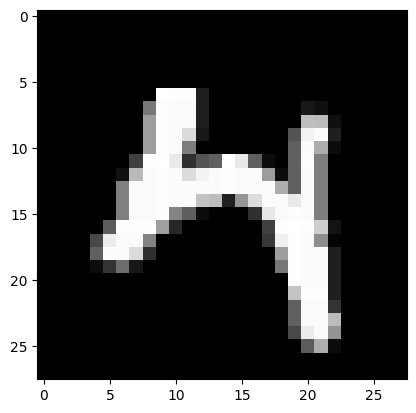

Predicted Label: 4
Actual/True Label: 4.0
Iteration: 31000


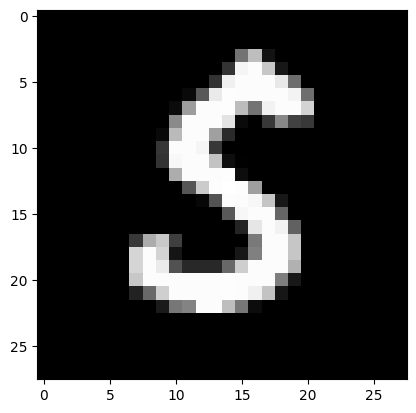

Predicted Label: 5
Actual/True Label: 5.0
Iteration: 32000


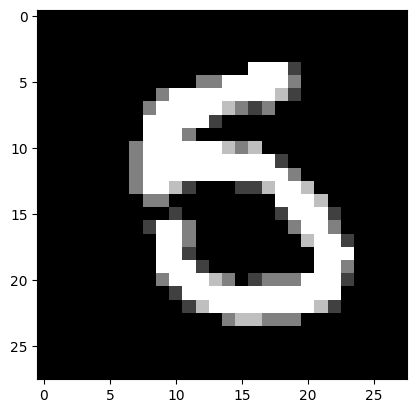

Predicted Label: 5
Actual/True Label: 5.0
Iteration: 33000


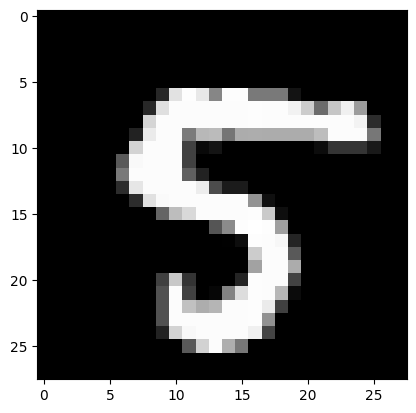

Predicted Label: 5
Actual/True Label: 5.0
Iteration: 34000


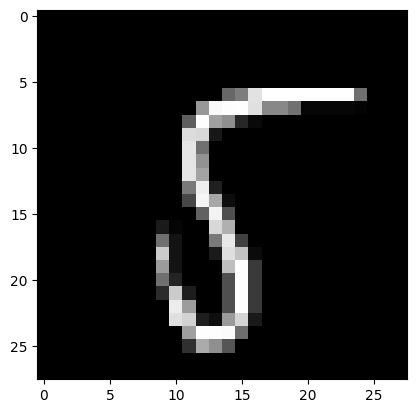

Predicted Label: 5
Actual/True Label: 5.0
Iteration: 35000


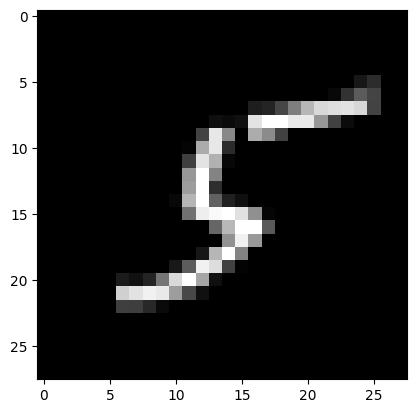

Predicted Label: 5
Actual/True Label: 5.0
Iteration: 36000


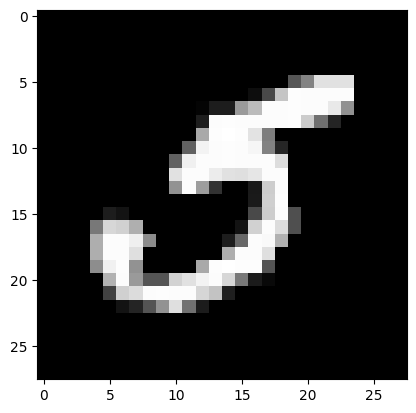

Predicted Label: 5
Actual/True Label: 5.0
Iteration: 37000


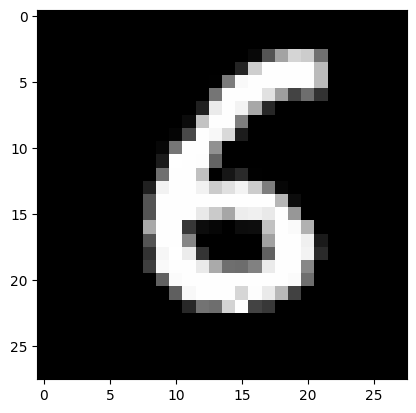

Predicted Label: 6
Actual/True Label: 6.0
Iteration: 38000


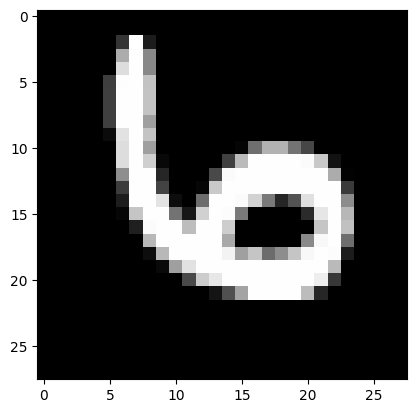

Predicted Label: 6
Actual/True Label: 6.0
Iteration: 39000


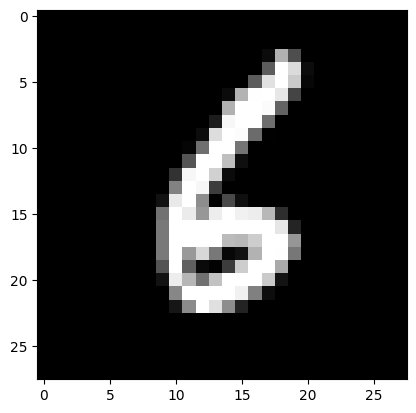

Predicted Label: 6
Actual/True Label: 6.0
Iteration: 40000


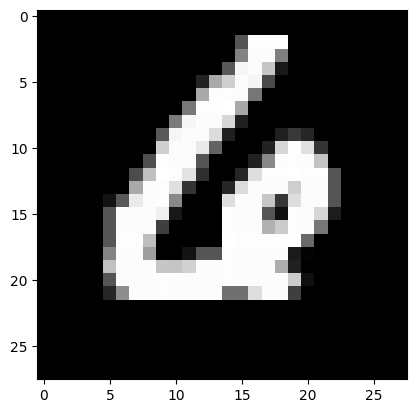

Predicted Label: 6
Actual/True Label: 6.0
Iteration: 41000


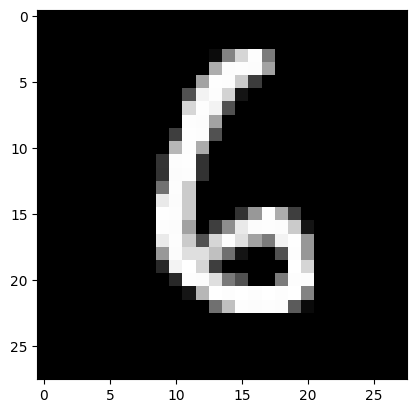

Predicted Label: 6
Actual/True Label: 6.0
Iteration: 42000


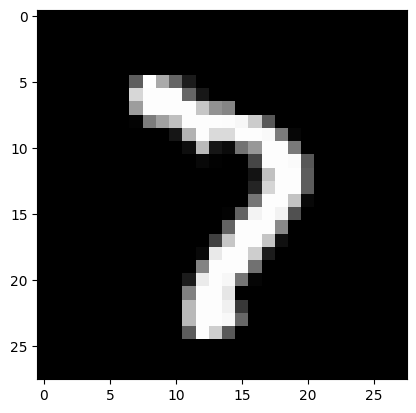

Predicted Label: 7
Actual/True Label: 7.0
Iteration: 43000


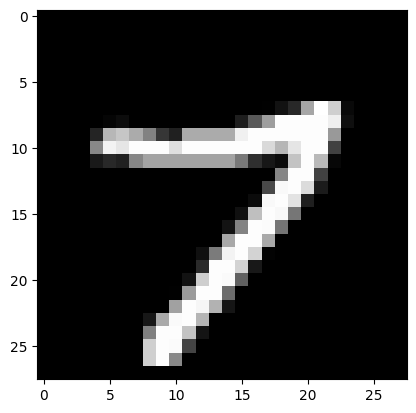

Predicted Label: 7
Actual/True Label: 7.0
Iteration: 44000


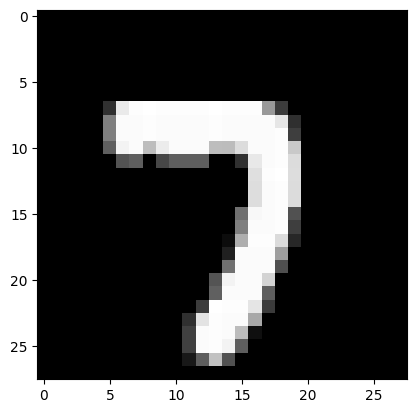

Predicted Label: 7
Actual/True Label: 7.0
Iteration: 45000


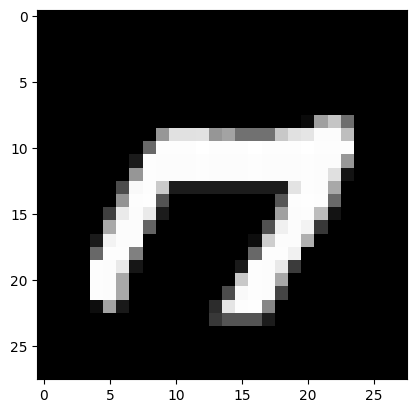

Predicted Label: 7
Actual/True Label: 7.0
Iteration: 46000


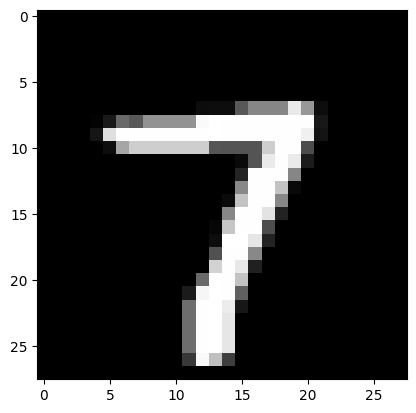

Predicted Label: 7
Actual/True Label: 7.0
Iteration: 47000


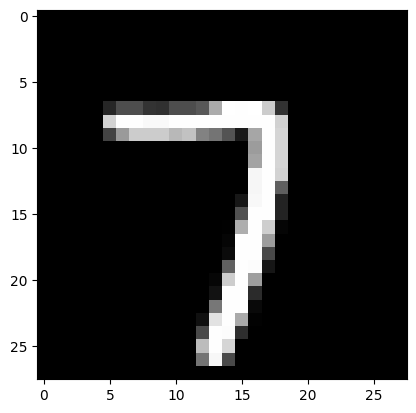

Predicted Label: 7
Actual/True Label: 7.0
Iteration: 48000


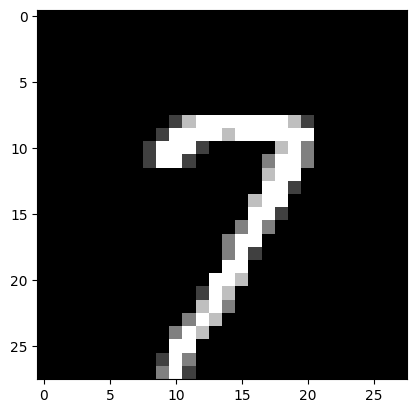

Predicted Label: 7
Actual/True Label: 7.0
Iteration: 49000


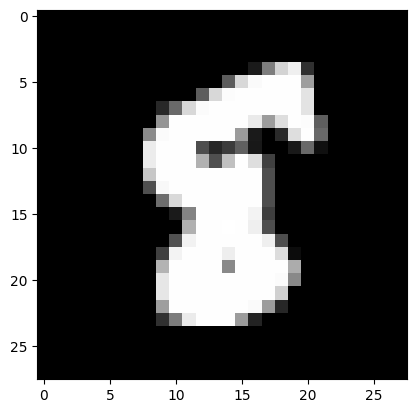

Predicted Label: 8
Actual/True Label: 8.0
Iteration: 50000


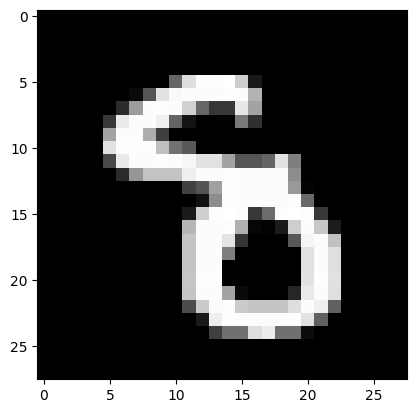

Predicted Label: 8
Actual/True Label: 8.0
Iteration: 51000


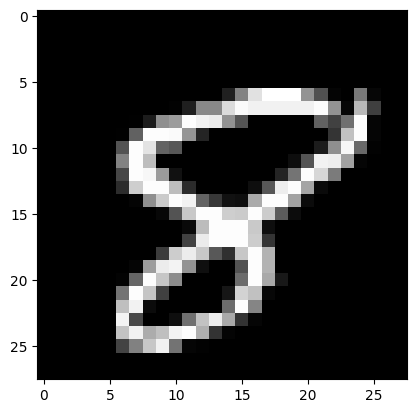

Predicted Label: 8
Actual/True Label: 8.0
Iteration: 52000


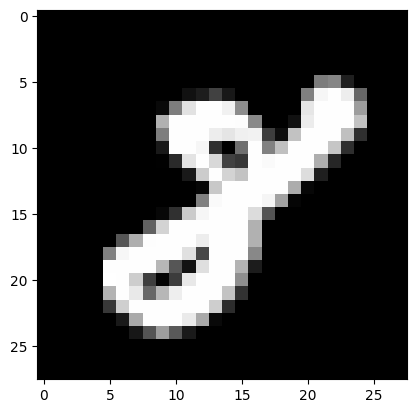

Predicted Label: 8
Actual/True Label: 8.0
Iteration: 53000


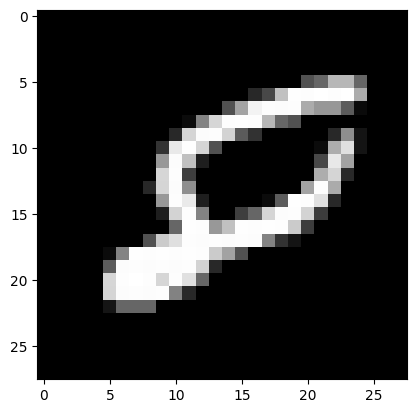

Predicted Label: 8
Actual/True Label: 8.0
Iteration: 54000


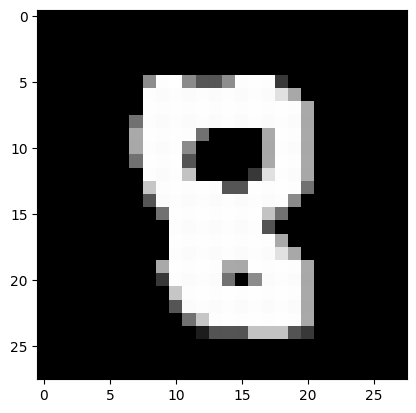

Predicted Label: 8
Actual/True Label: 8.0
Iteration: 55000


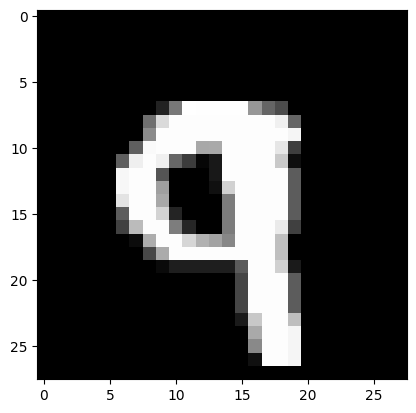

Predicted Label: 9
Actual/True Label: 9.0
Iteration: 56000


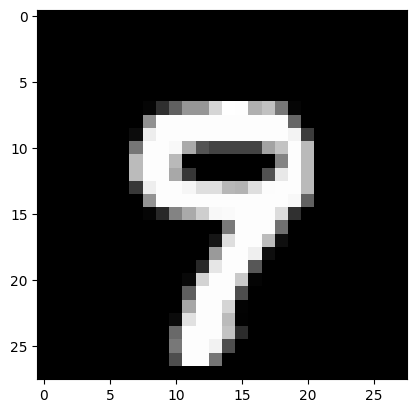

Predicted Label: 9
Actual/True Label: 9.0
Iteration: 57000


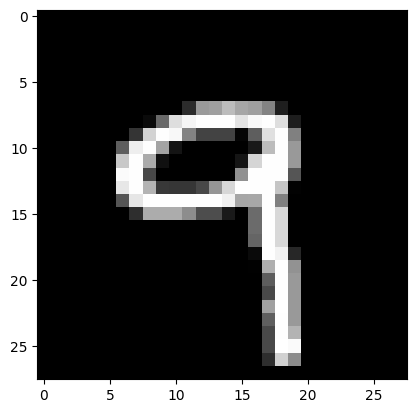

Predicted Label: 9
Actual/True Label: 9.0
Iteration: 58000


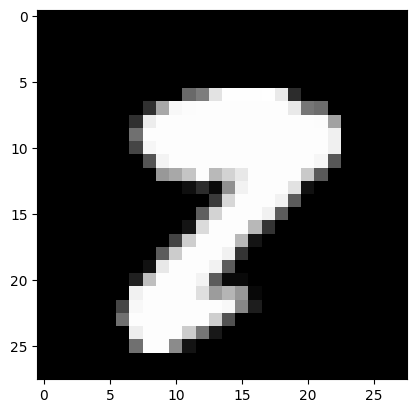

Predicted Label: 8
Actual/True Label: 9.0
Iteration: 59000


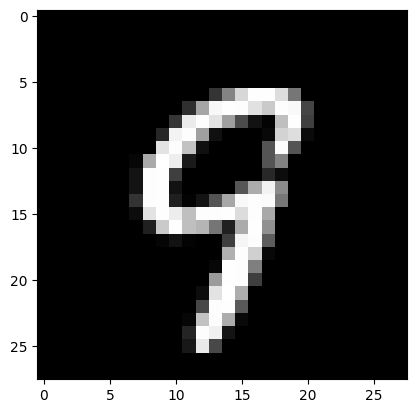

Predicted Label: 9
Actual/True Label: 9.0
Training Set Accuracy: 98.908333
Precision =  0.9890833333333333


In [8]:
# Loading mat file
data = loadmat('mnist-original.mat')

# Extracting features from mat file
X = data['data']
X = X.transpose()

# Normalizing the data
X = X / 255

# Extracting labels from mat file
y = data['label']
y = y.flatten()

# Splitting data into training set with 60,000 examples
X_train = X[:60000, :]
y_train = y[:60000]

# Splitting data into testing set with 10,000 examples
X_test = X[60000:, :]
y_test = y[60000:]

m = X.shape[0]
input_layer_size = 784 # Images are of (28 X 28) px so there will be 784 features
hidden_layer_one_size = 128
hidden_layer_two_size = 64
num_labels = 10 # There are 10 classes [0,9]

# Randomly initialising Thetas
initial_Theta1 = initialise(hidden_layer_one_size, input_layer_size)
initial_Theta2 = initialise(hidden_layer_two_size, hidden_layer_one_size)
initial_Theta3 = initialise(num_labels, hidden_layer_two_size)

# Unrolling parameters into a single column vector
initial_nn_params = np.concatenate((initial_Theta1.flatten(), initial_Theta2.flatten(), initial_Theta3.flatten()))
maxiter = 100
lambda_reg = 0.1 # To avoid overfitting
myargs = (input_layer_size, hidden_layer_one_size, hidden_layer_two_size, num_labels, X_train, y_train, lambda_reg)

# Calling minimize function to minimize cost function and to train weights
results = minimize(neural_network, x0=initial_nn_params, args=myargs, options={'disp': True, 'maxiter': maxiter}, method = "L-BFGS-B", jac = True)

nn_params = results["x"] # Trained Theta is extracted

# Weights are split back to Theta1, Theta2, Theta3
Theta1 = np.reshape(nn_params[:hidden_layer_one_size * (input_layer_size + 1)], (hidden_layer_one_size, input_layer_size + 1)) # shape = (128, 785)

Theta2 = np.reshape(nn_params[hidden_layer_one_size * (input_layer_size + 1): hidden_layer_one_size * (input_layer_size + 1) + hidden_layer_two_size * (hidden_layer_one_size + 1)], (hidden_layer_two_size, hidden_layer_one_size + 1)) # shape = (64, 129)

Theta3 = np.reshape(nn_params[hidden_layer_one_size * (input_layer_size +1) + hidden_layer_two_size * (hidden_layer_one_size + 1) : ], (num_labels, hidden_layer_two_size + 1)) # shape = (10, 65)

# Checking test set accuracy of our model
pred = predict(Theta1, Theta2, Theta3, X_test)
display_images_after_1000_predictions(Theta1, Theta2, Theta3, X_test, y_test)
print('Test Set Accuracy: {:f}'.format((np.mean(pred == y_test) * 100)))

# Checking train set accuracy of our model
pred = predict(Theta1, Theta2, Theta3, X_train)
display_images_after_1000_predictions(Theta1, Theta2, Theta3, X_train, y_train)
print('Training Set Accuracy: {:f}'.format((np.mean(pred == y_train) * 100)))

# Evaluating precision of our model
true_positive = 0
for i in range(len(pred)):
    if pred[i] == y_train[i]:
        true_positive += 1
false_positive = len(y_train) - true_positive
print('Precision = ', true_positive/(true_positive + false_positive))

# Saving Thetas in .txt file
np.savetxt('Theta1.txt', Theta1, delimiter = ' ')
np.savetxt('Theta2.txt', Theta2, delimiter = ' ')
np.savetxt('Theta3.txt', Theta3, delimiter = ' ')